+ MachineHack - Financial Risk Prediction
> Predict whether an organization is under a possible financial risk or not

For any organization, even the slightest chance of financial risk can not be ignored. Organizations conduct regular inspections on their expenditures and revenue to make sure that they do not fall below the critical limit. In this hackathon, you as a data scientist must use the given data to predict whether an organization is under a possible financial risk or not.

Content
Given are 7 distinguishing factors that can provide insight into whether an organization may face a financial risk or not. Your objective as a data scientist is to build a machine learning model that can predict if an organization will fall under the risk using the given features.

Acknowledgements
Data Description
The unzipped folder will have the following files.

Train.csv – 543 observations.
Test.csv – 233 observations.
Sample Submission – Sample format for the submission.
Target Variable: IsUnderRisk

Note:

The columns Past_Results indicate the number of times an organization fell under a financial risk



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [3]:
data.shape

(543, 8)

In [4]:
features = data.columns.drop('IsUnderRisk')
features

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results'],
      dtype='object')

In [5]:
data.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [7]:
data.var()

City                    216.757524
Location_Score          619.377270
Internal_Audit_Score     10.969488
External_Audit_Score     11.907103
Fin_Score                 9.966511
Loss_score                3.382378
Past_Results              0.584473
IsUnderRisk               0.234518
dtype: float64

### Univariate Data Analysis
> Continuous variables

- Histograms

<AxesSubplot:xlabel='Location_Score', ylabel='Count'>

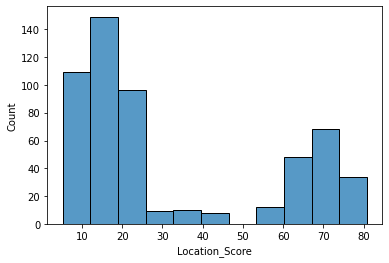

In [8]:
columns = ['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score', 'Fin_Score', 'Loss_score']

sns.histplot(data['Location_Score'])

<AxesSubplot:xlabel='Internal_Audit_Score', ylabel='Count'>

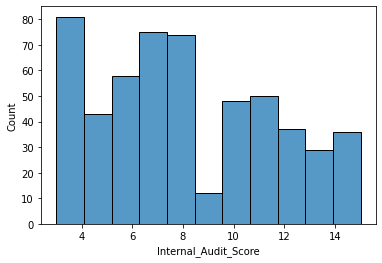

In [9]:
sns.histplot(data['Internal_Audit_Score'])

<AxesSubplot:xlabel='External_Audit_Score', ylabel='Count'>

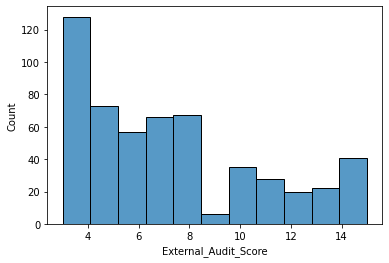

In [10]:
sns.histplot(data['External_Audit_Score'])

<AxesSubplot:xlabel='Fin_Score', ylabel='Count'>

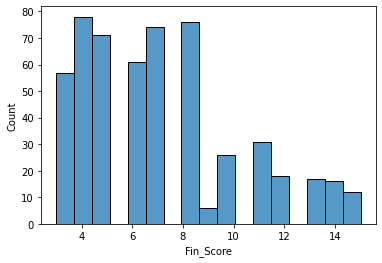

In [11]:
sns.histplot(data['Fin_Score'])

<AxesSubplot:xlabel='Loss_score', ylabel='Count'>

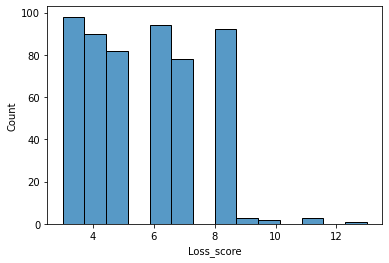

In [12]:
sns.histplot(data['Loss_score'])

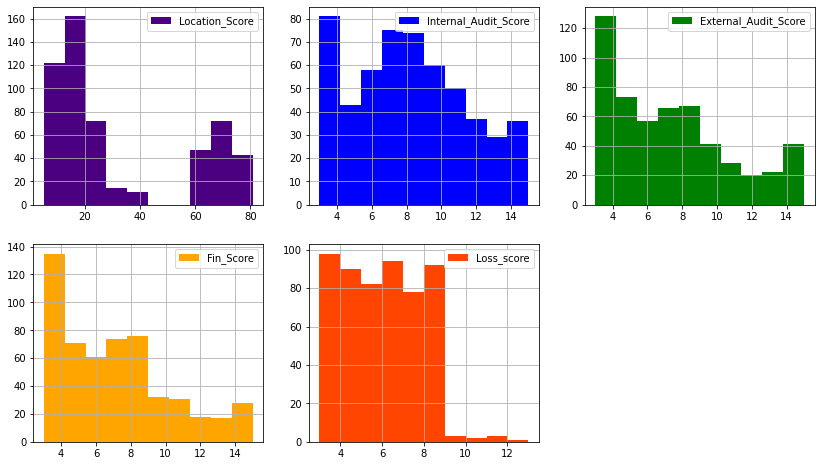

In [13]:
plt.figure(figsize=(14,8))
clr=['indigo','blue','green','orange','orangered']

for i,j in zip(range(1,6),columns):
    plt.subplot(2,3,i)
    data[j].hist(color = clr[i-1], label=j)
    plt.legend()
    

- Density plots

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

<Figure size 1152x432 with 0 Axes>

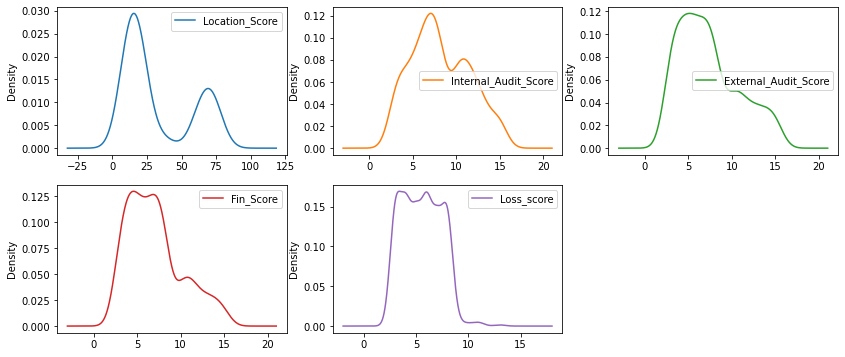

In [14]:
plt.figure(figsize=(16, 6))

data[columns].plot(kind = 'density', subplots = True, sharex = False, sharey = False, figsize=(14, 6), layout = (2, 3))

<AxesSubplot:>

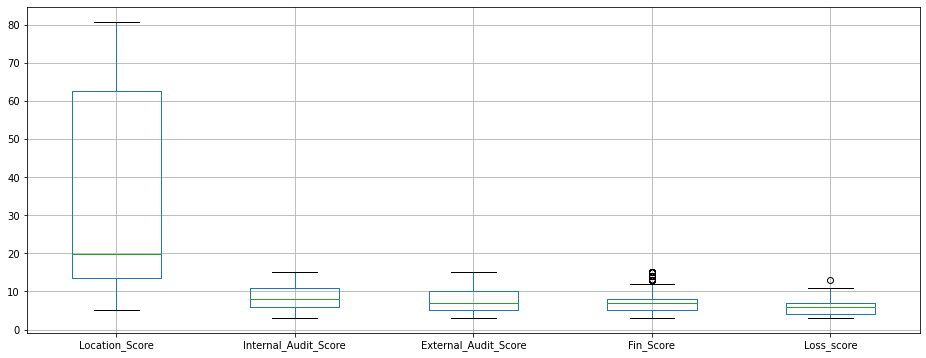

In [15]:
plt.figure(figsize = (16, 6))

data.boxplot(column=columns)

> Discrete Variables

<AxesSubplot:xlabel='City', ylabel='Count'>

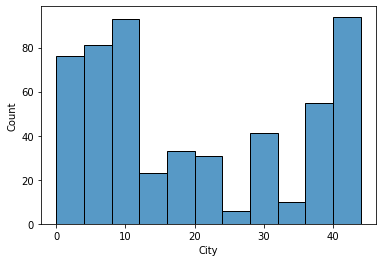

In [16]:
sns.histplot(data.City)

In [17]:
data.City.value_counts().sort_index()

0      8
1     14
2     31
3     23
4     15
5     27
6     38
7      1
8     10
9     45
10    35
11     3
12     3
13    18
14     1
15     1
16     6
17     7
18     6
19    14
20     2
21     3
22     7
23    19
24     1
25     1
26     1
27     3
28     6
29     3
30     7
31    25
32     3
33     1
35     6
37    27
38    26
39     2
40    55
41    36
42     1
43     1
44     1
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Count'>

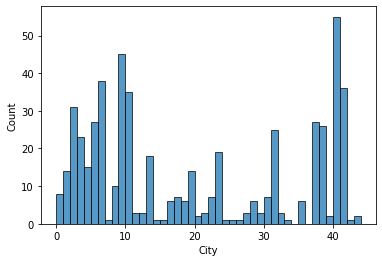

In [18]:
sns.histplot(data.City, bins = 44)

<AxesSubplot:xlabel='Past_Results', ylabel='Count'>

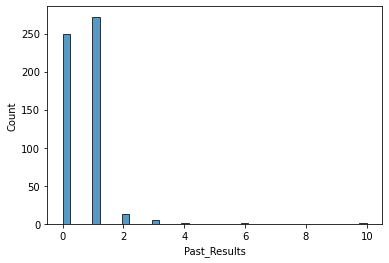

In [19]:
sns.histplot(data.Past_Results)

In [20]:
data.Past_Results.value_counts()

1     272
0     250
2      13
3       5
4       1
6       1
10      1
Name: Past_Results, dtype: int64

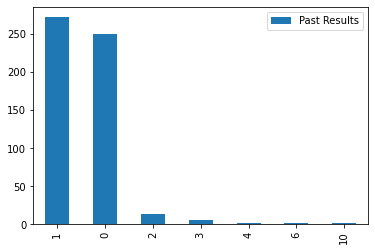

In [21]:
data.Past_Results.value_counts().plot(kind = 'bar', label = 'Past Results')
plt.legend()

Target Variable (IsUnderRisk)

In [22]:
data.IsUnderRisk.value_counts()

1    340
0    203
Name: IsUnderRisk, dtype: int64

<AxesSubplot:>

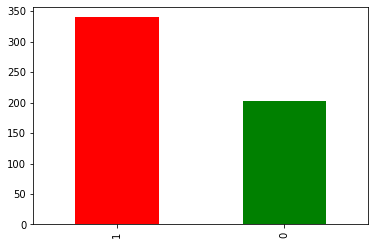

In [23]:
data.IsUnderRisk.value_counts().plot(kind = 'bar', color = ['red', 'green'])

In [24]:
train = data.sample(frac = 0.8)
valid = data.drop(train.index)

In [25]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
18,6,41.253,3,6,4,5,0,0
421,2,10.854,8,8,3,4,0,1
159,6,7.168,7,8,4,5,1,1
135,38,62.351,6,4,8,7,0,0
115,31,16.789,13,6,6,8,0,1


In [26]:
print(f'Training data: {train.shape}')
print(f'Validation data: {valid.shape}')

Training data: (434, 8)
Validation data: (109, 8)


In [27]:
X_train, y_train = train[features], train['IsUnderRisk']
X_valid, y_valid = valid[features], valid['IsUnderRisk']

X_train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
18,6,41.253,3,6,4,5,0
421,2,10.854,8,8,3,4,0
159,6,7.168,7,8,4,5,1
135,38,62.351,6,4,8,7,0
115,31,16.789,13,6,6,8,0


In [28]:
min_ = X_train.min(axis = 0)
print('------------------')
print('Minimum values')
print('------------------')
print(min_)

max_ = X_train.max(axis = 0)
print('------------------')
print('Maximum values')
print('------------------')
print(max_)

------------------
Minimum values
------------------
City                    0.000
Location_Score          5.185
Internal_Audit_Score    3.000
External_Audit_Score    3.000
Fin_Score               3.000
Loss_score              3.000
Past_Results            0.000
dtype: float64
------------------
Maximum values
------------------
City                    44.000
Location_Score          80.809
Internal_Audit_Score    15.000
External_Audit_Score    15.000
Fin_Score               15.000
Loss_score              13.000
Past_Results            10.000
dtype: float64


In [29]:
# Range
max_ - min_

City                    44.000
Location_Score          75.624
Internal_Audit_Score    12.000
External_Audit_Score    12.000
Fin_Score               12.000
Loss_score              10.000
Past_Results            10.000
dtype: float64

In [30]:
y_train.head()

18     0
421    1
159    1
135    0
115    1
Name: IsUnderRisk, dtype: int64

In [31]:
# Classification models
# Tree-Based
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Distance_Based
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Metrics
from sklearn import metrics

##  DecisionTreeClassifier

In [32]:
model_dt = DecisionTreeClassifier(random_state = 22)

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=22)

In [33]:
preds_dt = model_dt.predict(X_valid)

In [34]:
# DT Accuracy
acc_dt = metrics.accuracy_score(preds_dt, y_valid)
print(f'Accuracy Score: {acc_dt}')

Accuracy Score: 0.8440366972477065


In [35]:
# # DT Recall
# recall_dt = metrics.f1_recall(preds_dt, y_valid)
# print(f'Recall : {recall_dt}')

## RandomForestClassifier

In [36]:
model_rf = RandomForestClassifier(random_state = 11)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [37]:
preds_rf = model_rf.predict(X_valid)

In [38]:
acc_rf = metrics.accuracy_score(preds_rf, y_valid)
print(f'Accuracy Score: {acc_rf}')

Accuracy Score: 0.8623853211009175


## LogisticRegression

In [39]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
preds_lr = model_lr.predict(X_valid)

In [41]:
acc_lr = metrics.accuracy_score(preds_lr, y_valid)
print(f'Accuracy Score: {acc_lr}')

Accuracy Score: 0.8256880733944955


## KNeighborsClassifier

In [42]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
preds_knn = model_knn.predict(X_valid)

In [44]:
acc_knn = metrics.accuracy_score(preds_knn, y_valid)
print(f'Accuracy Score: {acc_knn}')

Accuracy Score: 0.7889908256880734


## SupportVectorClassifier

In [45]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [46]:
preds_svc = model_svc.predict(X_valid)

In [47]:
acc_svc = metrics.accuracy_score(preds_svc, y_valid)
print(f'Accuracy Score: {acc_svc}')

Accuracy Score: 0.7889908256880734


Without scaling the data, the RandomForestClassifier produces the best performance.
Distance-based model seems to be struggling in their classification due to the disparities in scale of the features.

## Using Scaled Data

In [48]:
models = ['decisiontree', 'randomforest', 'logisticregression', 'knn', 'svc']

In [49]:
def train_evaluate_model(list, df, target):
    
    # Splitting the training and validation sets    
    train = df.sample(frac = 0.8)
    valid = df.drop(train.index)
    
    # Separating features and target
    features = df.columns.drop(str(target))
    
    X_train, y_train = train[features], train[target]
    X_valid, y_valid = valid[features], valid[target]
    
    # Scaling the data
    scaler = StandardScaler()
    
    features = X_train.columns
    
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = features)
    X_valid = pd.DataFrame(scaler.transform(X_valid), columns = features)
    
    print(X_train.head())
    print('\n-----------------------------------------------')
    
    # Training & Evaluating the models
    for model in list:
        
        if model == 'decisiontree':
            model_dt = DecisionTreeClassifier(random_state = 11)
            
            print('Training DecisionTreeClassifier........')
            model_dt.fit(X_train, y_train)
            print('-----------------------------------------------')
            
            print('Evaluating the model*********')
            preds_dt = model_dt.predict(X_valid)
            acc_score = metrics.accuracy_score(preds_dt, y_valid)            
            print('-----------------------------------------------')
            print(f'Accuracy: {acc_score}')
            
            print('\n-----------------------------------------------')
        
        elif model == 'randomforest':
            model_rf = RandomForestClassifier(random_state = 22)
            
            print('Training RandomForestClassifier........')
            model_rf.fit(X_train, y_train)
            print('-----------------------------------------------')
            
            print('Evaluating the model*********')
            preds_rf = model_rf.predict(X_valid)            
            print('-----------------------------------------------')
            acc_score = metrics.accuracy_score(preds_rf, y_valid)
            print(f'Accuracy: {acc_score}')
            
            print('\n-----------------------------------------------')
        
        elif model == 'logisticregression':
            model_lr = LogisticRegression()
            
            print('Training LogisticRegression........')
            model_lr.fit(X_train, y_train)
            print('-----------------------------------------------')
            print('Evaluating the model*********')
            preds_lr = model_lr.predict(X_valid)
            print('-----------------------------------------------')
            acc_score = metrics.accuracy_score(preds_lr, y_valid)
            print(f'Accuracy: {acc_score}')
            
            print('\n-----------------------------------------------')
            
        elif model == 'knn':
            model_knn = LogisticRegression()
            
            print('Training KNeighborsClassifier........')
            model_knn.fit(X_train, y_train)
            print('-----------------------------------------------')
            print('Evaluating the model*********')
            preds_knn = model_knn.predict(X_valid)
            print('-----------------------------------------------')            
            acc_score = metrics.accuracy_score(preds_knn, y_valid)
            print(f'Accuracy: {acc_score}')
            
            print('\n-----------------------------------------------')
            
        elif model == 'svc':
            model_svc = SVC()
            
            print('Training SupportVectorClassifier........')
            model_svc.fit(X_train, y_train)
            print('-----------------------------------------------')
            print('Evaluating the model*********')
            preds_svc = model_svc.predict(X_valid)
            print('-----------------------------------------------')
            
            acc_score = metrics.accuracy_score(preds_svc, y_valid)
            print(f'Accuracy: {acc_score}')
            
        

In [50]:
# Training and Evaluating the Models
train_evaluate_model(models, data, 'IsUnderRisk')

       City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
0 -0.048720        1.538610             -0.053220             -0.707544   
1 -0.048720       -0.913884             -1.553046             -0.132499   
2 -0.726422       -0.345302             -1.553046              0.155024   
3  1.374455        1.491532             -0.053220             -0.995067   
4 -1.133043        1.630640             -0.653150             -0.995067   

   Fin_Score  Loss_score  Past_Results  
0  -1.280126   -1.343334     -0.761656  
1  -0.653067    0.823978     -0.761656  
2  -1.280126   -0.259678      0.514632  
3  -0.026007    0.282150     -0.761656  
4  -0.026007    1.365807      0.514632  

-----------------------------------------------
Training DecisionTreeClassifier........
-----------------------------------------------
Evaluating the model*********
-----------------------------------------------
Accuracy: 0.7614678899082569

-----------------------------------------------
Training R

After scaling the data, distance-based models improved their performance significantly, with SupportVectorClassifier being almost as good as the RandomForestClassifier. However, the RandomForestClassifier still outperforms all the other models with a slight improvement in the performance.

The DecisionTreeClassifier performs poorly using scaled data.  

<AxesSubplot:>

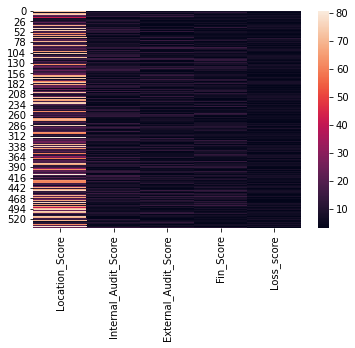

In [56]:
sns.heatmap(data[columns])